In [120]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.discovery import all_estimators
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC

# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [121]:
TEST_SIZE = 0.3

In [122]:
# load dataset from online_shoppers_intention.csv
shoppers_df = pd.read_csv("Dataset 3 (Online Shoppers Intention)/online_shoppers_intention.csv")

In [123]:
shoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


In [124]:
print(f"Rows: {shoppers_df.shape[0]}\nColumns: {shoppers_df.shape[1]}")

Rows: 12330
Columns: 18


In [125]:
print(shoppers_df.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [126]:
print(shoppers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12202 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12195 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12207 non-null  float64
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [127]:
shoppers_df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12202.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12195.000000,12330.000000,12330,12207.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503770,34.472398,31.731468,1194.746220,0.022191,0.043073,5.911196,0.061427,NaN,2.123618,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270882,140.749294,44.475503,1913.669288,0.048488,0.048597,18.632116,0.198917,NaN,0.911829,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [128]:
summary = {
    "Characteristic": [
        "File Type",
        "Dimensions",
        "Data Types",
        "Target Variable",
        "Import Method",
        "Source",
        "Contains Missing Data"
    ],
    "Value/Description": [
        "CSV",
        "12,330 rows x 18 columns",
        "Numerical, Categorical, Boolean",
        "Revenue (True/False)",
        "pd.read_csv('online_shoppers_intention.csv')",
        "UCI Machine Learning Repository",
        "Yes"
    ]
}
summary_df = pd.DataFrame(summary)
print(tabulate(summary_df, headers='keys', tablefmt='github', showindex=False))

| Characteristic        | Value/Description                            |
|-----------------------|----------------------------------------------|
| File Type             | CSV                                          |
| Dimensions            | 12,330 rows x 18 columns                     |
| Data Types            | Numerical, Categorical, Boolean              |
| Target Variable       | Revenue (True/False)                         |
| Import Method         | pd.read_csv('online_shoppers_intention.csv') |
| Source                | UCI Machine Learning Repository              |
| Contains Missing Data | Yes                                          |


In [129]:
missing = shoppers_df.isnull().sum()
print(missing[missing > 0])

Informational       128
PageValues          135
OperatingSystems    123
dtype: int64


In [130]:
shoppers_df = shoppers_df.dropna()
shoppers_df["Administrative"] = shoppers_df["Administrative"].astype(int)
shoppers_df["Administrative_Duration"] = shoppers_df["Administrative_Duration"].astype(float)
# this should have been int but csv has float values (all values are whole numbers)
shoppers_df["Informational"] = shoppers_df["Informational"].astype(int)
shoppers_df["Informational_Duration"] = shoppers_df["Informational_Duration"].astype(float)
shoppers_df["ProductRelated"] = shoppers_df["ProductRelated"].astype(int)
shoppers_df["ProductRelated_Duration"] = shoppers_df["ProductRelated_Duration"].astype(float)
shoppers_df["BounceRates"] = shoppers_df["BounceRates"].astype(float)
shoppers_df["ExitRates"] = shoppers_df["ExitRates"].astype(float)
# same here, should be int but csv has float values (all values are whole numbers)
shoppers_df["PageValues"] = shoppers_df["PageValues"].astype(int)
shoppers_df["SpecialDay"] = shoppers_df["SpecialDay"].astype(float)
# cast Month categorical type to ints 1-12
month_map = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12}
# drop null months where month is not in month_map
shoppers_df = shoppers_df[shoppers_df["Month"].isin(month_map.keys())]
shoppers_df["Month"] = shoppers_df["Month"].map(month_map).astype(int)
shoppers_df["OperatingSystems"] = shoppers_df["OperatingSystems"].astype(int)
shoppers_df["Browser"] = shoppers_df["Browser"].astype(int)
shoppers_df["Region"] = shoppers_df["Region"].astype(int)
shoppers_df["TrafficType"] = shoppers_df["TrafficType"].astype(int)
# cast visitortype to int (0 = New_Visitor, 1 = Returning_Visitor, 2 = Other)
visitor_map = {"New_Visitor": 0, "Returning_Visitor": 1, "Other": 2}
shoppers_df["VisitorType"] = shoppers_df["VisitorType"].map(visitor_map)
shoppers_df["Weekend"] = shoppers_df["Weekend"].astype(bool)
shoppers_df["Revenue"] = shoppers_df["Revenue"].astype(bool)
print(shoppers_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11670 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11670 non-null  int64  
 1   Administrative_Duration  11670 non-null  float64
 2   Informational            11670 non-null  int64  
 3   Informational_Duration   11670 non-null  float64
 4   ProductRelated           11670 non-null  int64  
 5   ProductRelated_Duration  11670 non-null  float64
 6   BounceRates              11670 non-null  float64
 7   ExitRates                11670 non-null  float64
 8   PageValues               11670 non-null  int64  
 9   SpecialDay               11670 non-null  float64
 10  Month                    11670 non-null  int64  
 11  OperatingSystems         11670 non-null  int64  
 12  Browser                  11670 non-null  int64  
 13  Region                   11670 non-null  int64  
 14  TrafficType              11

In [131]:
agg_df = shoppers_df.groupby('Month')['PageValues'].mean().reset_index()
print(agg_df)

   Month  PageValues
0      2    0.894444
1      3    3.929189
2      5    5.354918
3      7    4.068884
4      8    5.713270
5      9    7.535147
6     10    8.537002
7     11    7.051352
8     12    6.813213


In [132]:
shoppers_df['TotalDuration'] = shoppers_df['Administrative_Duration'] + shoppers_df['Informational_Duration'] + shoppers_df['ProductRelated_Duration']

In [133]:
shoppers_df.drop_duplicates(inplace=True)

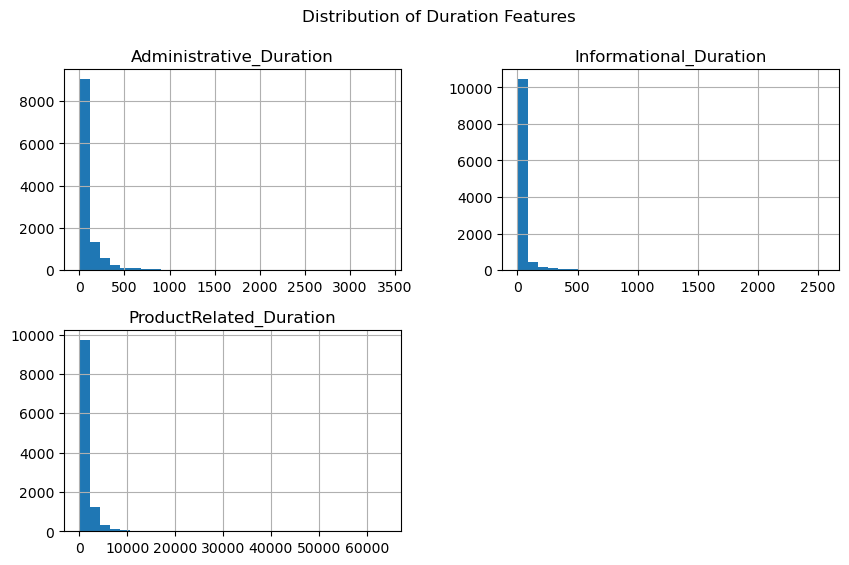

In [134]:
shoppers_df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].hist(bins=30, figsize=(10,6))
plt.suptitle('Distribution of Duration Features')
plt.show()

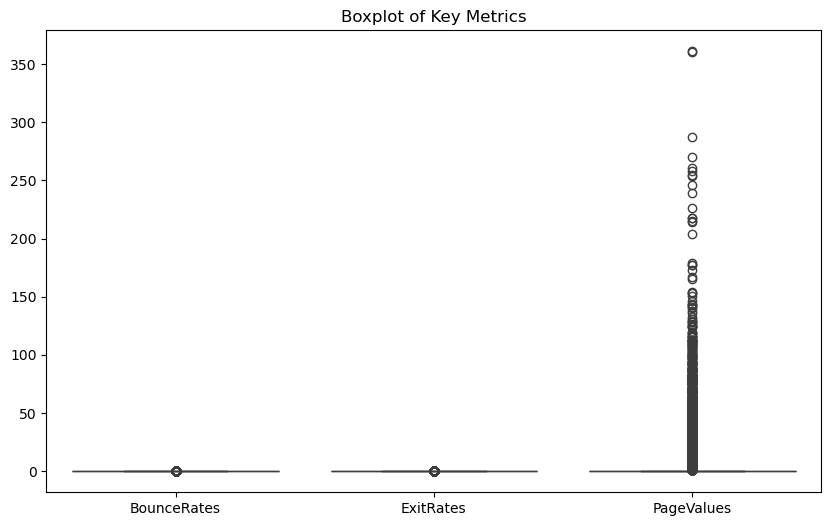

In [135]:
plt.figure(figsize=(10,6))
sns.boxplot(data=shoppers_df[['BounceRates', 'ExitRates', 'PageValues']])
plt.title('Boxplot of Key Metrics')
plt.show()

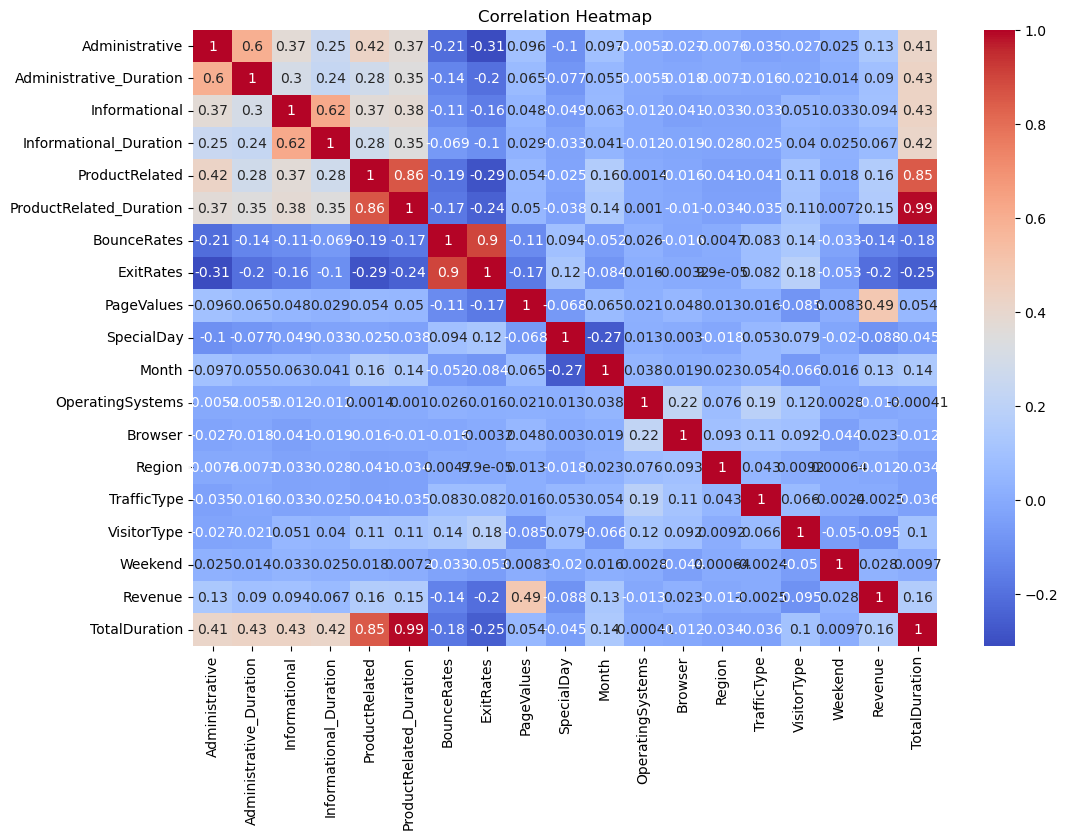

In [136]:
corr_matrix = shoppers_df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

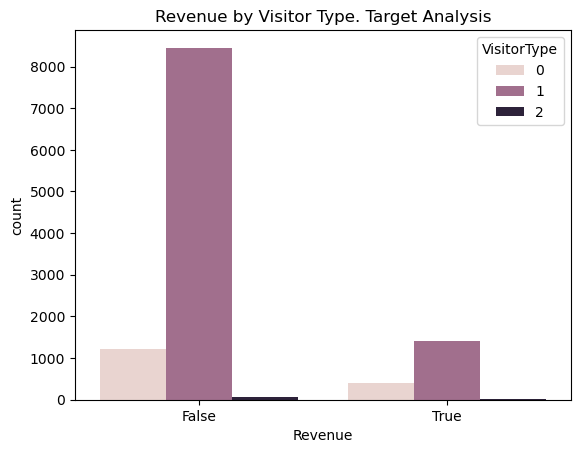

In [137]:
sns.countplot(x='Revenue', hue='VisitorType', data=shoppers_df)
plt.title('Revenue by Visitor Type. Target Analysis')
plt.show()

In [138]:
num_cols = shoppers_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = shoppers_df.select_dtypes(include=['object', 'bool']).columns.tolist()
print("Numerical Variables:", num_cols)
print("Categorical Variables:", cat_cols)

Numerical Variables: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'TotalDuration']
Categorical Variables: ['Weekend', 'Revenue']


In [139]:
num_cols = shoppers_df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Summary:")
print(shoppers_df[num_cols].describe())
cat_cols = shoppers_df.select_dtypes(include=['object', 'bool']).columns
print("\nCategorical Summary:")
for col in cat_cols:
    print(f"\n{col} value counts:")
    print(shoppers_df[col].value_counts())

Numerical Summary:
       Administrative  Administrative_Duration  Informational  \
count    11552.000000             11552.000000   11552.000000   
mean         2.339335                82.358666       0.506146   
std          3.323623               178.244581       1.273640   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 9.750000       0.000000   
75%          4.000000                96.000000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            11552.000000    11552.000000             11552.000000   
mean                35.278493       31.864352              1203.906654   
std                143.551723       44.153017              1907.386634   
min                  0.000000        0.000000                 0.000000   
25%                  0.00

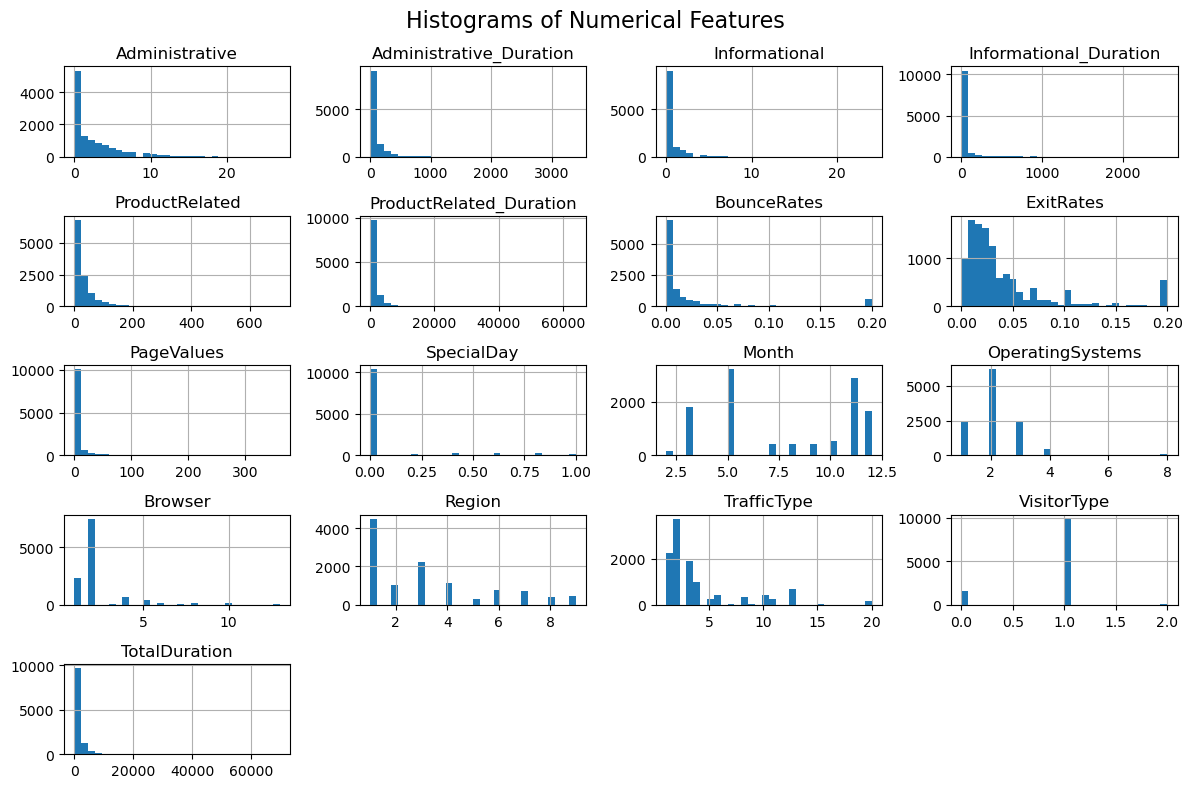

In [140]:
shoppers_df[num_cols].hist(bins=30, figsize=(12,8))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

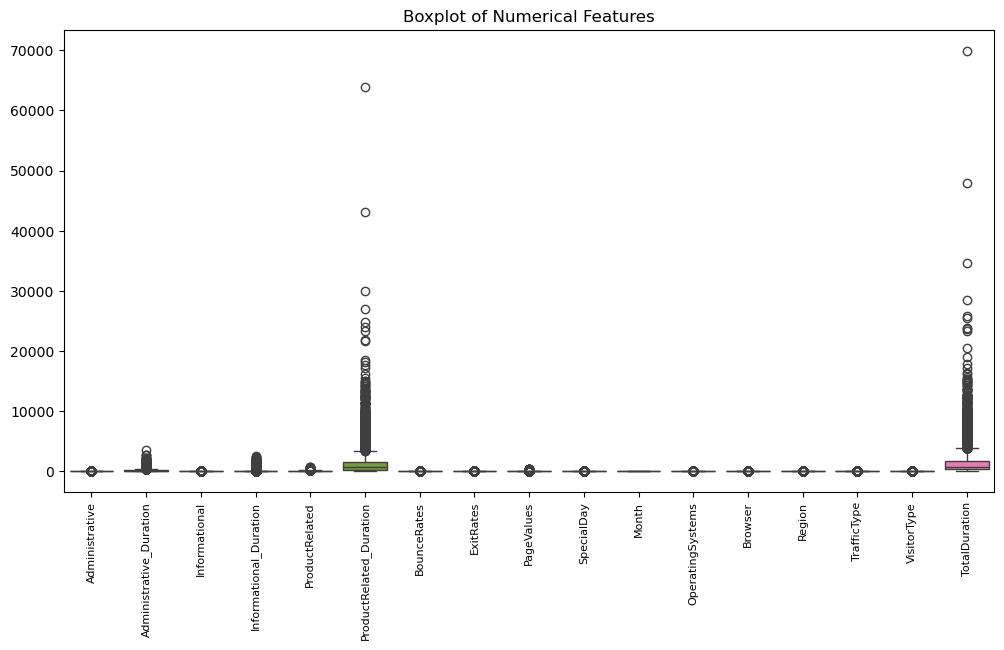

In [141]:
# make x axis font size smaller for clarity
plt.figure(figsize=(12,6))
sns.boxplot(data=shoppers_df[num_cols])
plt.title('Boxplot of Numerical Features')
plt.xticks(fontsize=8, rotation=90)
plt.show()

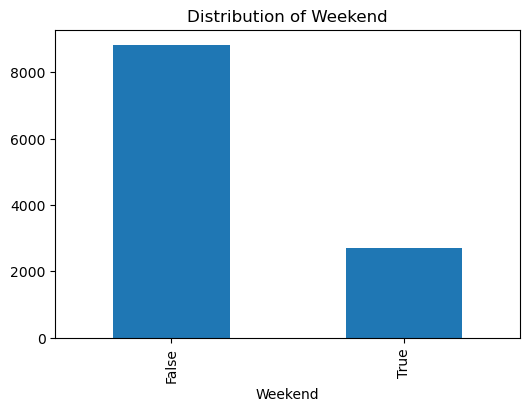

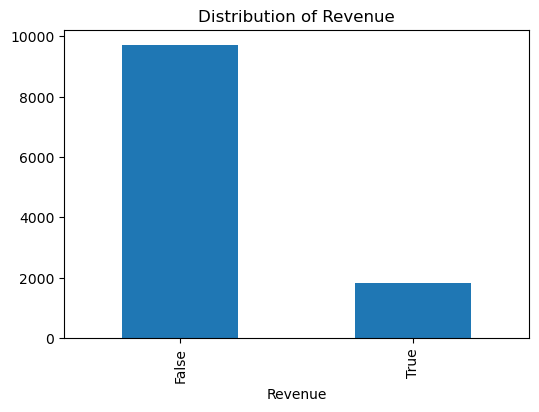

In [142]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    shoppers_df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

In [143]:
dependent_var = 'Revenue'
independent_vars = [col for col in shoppers_df.columns if col !=dependent_var]
num_independent = shoppers_df[independent_vars].select_dtypes(include=['float64' , 'int64']).columns.tolist()
cat_independent = shoppers_df[independent_vars].select_dtypes(include=['object' , 'bool']).columns.tolist()
print("Dependent Variable:", dependent_var)
print("\nNumerical Independent Variables:", num_independent)
print("\nCategorical Independent Variables:", cat_independent)

Dependent Variable: Revenue

Numerical Independent Variables: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'TotalDuration']

Categorical Independent Variables: ['Weekend']


Correlation of Independent Variables with Revenue:
PageValues                 0.489125
ProductRelated             0.160606
TotalDuration              0.156483
ProductRelated_Duration    0.153189
Administrative             0.134436
Month                      0.126363
Informational              0.094280
Administrative_Duration    0.090224
Informational_Duration     0.067417
Weekend                    0.027987
Browser                    0.023241
TrafficType               -0.002535
Region                    -0.012379
OperatingSystems          -0.013105
SpecialDay                -0.088062
VisitorType               -0.094846
BounceRates               -0.143872
ExitRates                 -0.204121
Name: Revenue, dtype: float64


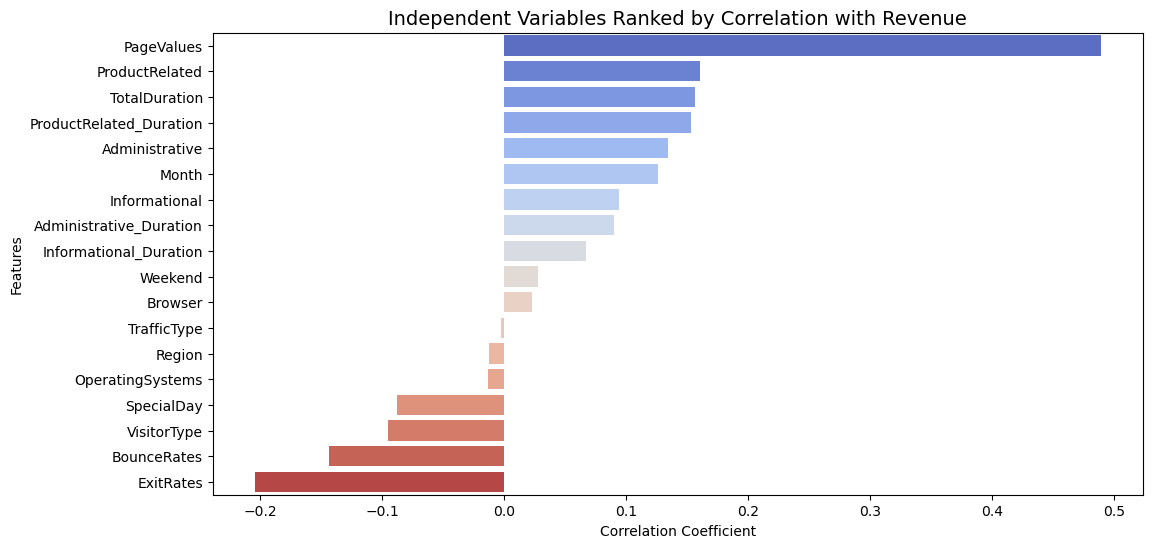

In [144]:
corr_matrix = shoppers_df.corr(numeric_only=True)
revenue_corr = corr_matrix['Revenue'].drop('Revenue')
revenue_corr_sorted = revenue_corr.sort_values(ascending=False)
print("Correlation of Independent Variables with Revenue:")
print(revenue_corr_sorted)
plt.figure(figsize=(12,6))
sns.barplot(x=revenue_corr_sorted.values, y=revenue_corr_sorted.index,
    palette='coolwarm')
plt.title('Independent Variables Ranked by Correlation with Revenue', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

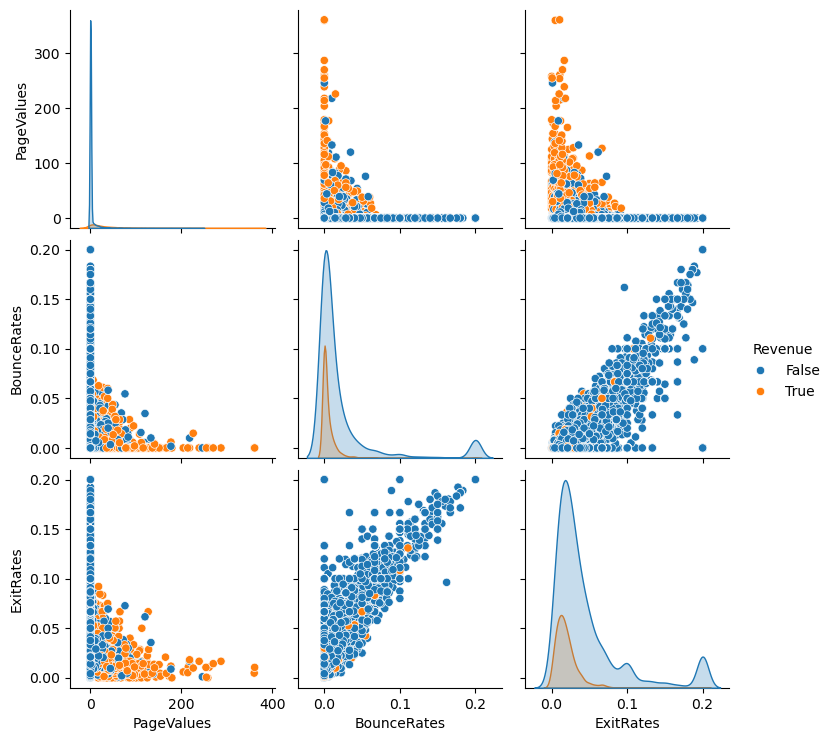

In [145]:
sns.pairplot(shoppers_df[['PageValues', 'BounceRates', 'ExitRates', 'Revenue']], hue ='Revenue')
plt.show()

**Key interpretations:**
- PageValues is the strongest predictor of Revenue.
- BounceRates and ExitRates negatively relate to Revenue.
- Most sessions do not convert. The scatterplots will show a dense cluster of Revenue=False points near zero PageValues and higher BounceRates.
- Distributions are skewed. Histograms confirm that numeric features like PageValues and durations are not normally distributed

**Supervised or Unsupervised Learning:**
- In our dataset, revenue is a binary variable indicating whether a transaction occurred, a clear label for the outcome we want to predict. Therefore, we used supervised learning because we have input features and a known output. Our goal is to predict whether a session will result in a purchase.

In [146]:
independent_cols = shoppers_df.drop('Revenue', axis=1)
dependent_col = shoppers_df['Revenue']
scaler = StandardScaler()
independent_scaled = scaler.fit_transform(independent_cols)
x_train, x_test, y_train, y_test = train_test_split(independent_scaled, dependent_col, test_size=TEST_SIZE, random_state=123)
logistic_reg_model = LogisticRegression().fit(x_train, y_train)
y_pred = logistic_reg_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Logistic Regression Model Accuracy: 0.8794
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2934
        True       0.75      0.32      0.45       532

    accuracy                           0.88      3466
   macro avg       0.82      0.65      0.69      3466
weighted avg       0.87      0.88      0.86      3466



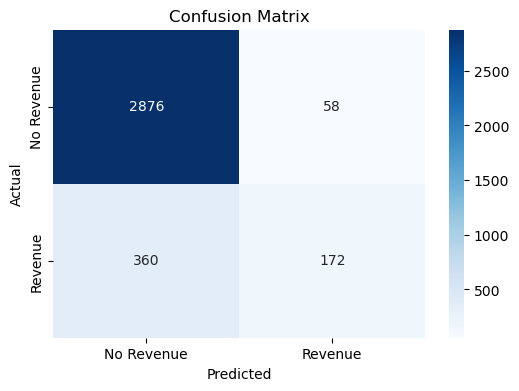

In [147]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [148]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_knn_pred = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, y_knn_pred)
print(f'KNN Classifier Model Accuracy: {knn_accuracy:.4f}')
print(f"Classification Report:\n{classification_report(y_test, y_knn_pred)}")

KNN Classifier Model Accuracy: 0.8748
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.97      0.93      2934
        True       0.67      0.37      0.48       532

    accuracy                           0.87      3466
   macro avg       0.78      0.67      0.70      3466
weighted avg       0.86      0.87      0.86      3466



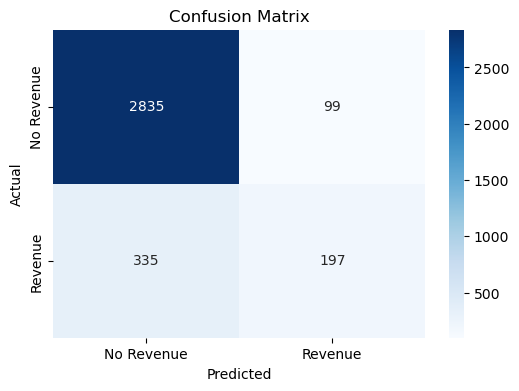

In [149]:
cm = confusion_matrix(y_test, y_knn_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [150]:
rf = RandomForestClassifier(random_state=123)
rf.fit(x_train, y_train)
y_rf_pred = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print(f'Random Forest Classifier Model Accuracy: {rf_accuracy:.4f}')
print(f"Classification Report:\n{classification_report(y_test, y_rf_pred)}")

Random Forest Classifier Model Accuracy: 0.9042
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      2934
        True       0.76      0.55      0.64       532

    accuracy                           0.90      3466
   macro avg       0.84      0.76      0.79      3466
weighted avg       0.90      0.90      0.90      3466



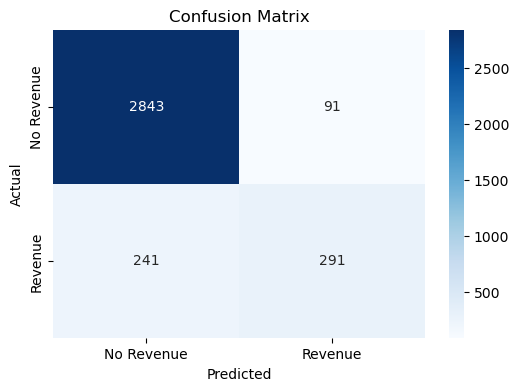

In [151]:
cm = confusion_matrix(y_test, y_rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [152]:
gbc_model = GradientBoostingClassifier(random_state=123)
gbc_model.fit(x_train, y_train)
y_gbc_pred = gbc_model.predict(x_test)
gbc_accuracy = accuracy_score(y_test, y_gbc_pred)
print(f"Gradient Boosting Classifier Model Accuracy: {gbc_accuracy:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_gbc_pred)}")

Gradient Boosting Classifier Model Accuracy: 0.9080
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      2934
        True       0.76      0.59      0.66       532

    accuracy                           0.91      3466
   macro avg       0.84      0.78      0.80      3466
weighted avg       0.90      0.91      0.90      3466



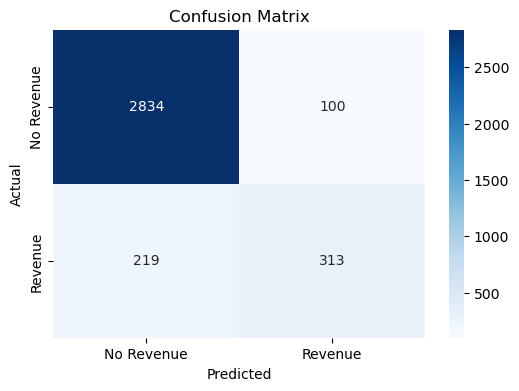

In [153]:
cm = confusion_matrix(y_test, y_gbc_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [154]:
hgbc_model = HistGradientBoostingClassifier(random_state=123)
hgbc_model.fit(x_train, y_train)
y_hgbc_pred = hgbc_model.predict(x_test)
hgbc_accuracy = accuracy_score(y_test, y_hgbc_pred)
print(f"Hist Gradient Boosting Classifier Model Accuracy: {hgbc_accuracy:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_hgbc_pred)}")

Hist Gradient Boosting Classifier Model Accuracy: 0.9031
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2934
        True       0.74      0.57      0.64       532

    accuracy                           0.90      3466
   macro avg       0.83      0.77      0.79      3466
weighted avg       0.90      0.90      0.90      3466



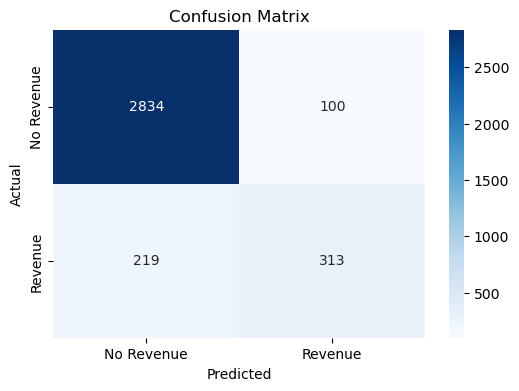

In [155]:
cm = confusion_matrix(y_test, y_gbc_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [156]:
xgb_model = XGBClassifier(random_state=123)
xgb_model.fit(x_train, y_train)
y_xgb_pred = xgb_model.predict(x_test)
xgb_accuracy = accuracy_score(y_test, y_xgb_pred)
print(f"XGBoost Classifier Model Accuracy: {xgb_accuracy:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_xgb_pred)}")

XGBoost Classifier Model Accuracy: 0.9028
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2934
        True       0.74      0.56      0.64       532

    accuracy                           0.90      3466
   macro avg       0.83      0.76      0.79      3466
weighted avg       0.90      0.90      0.90      3466



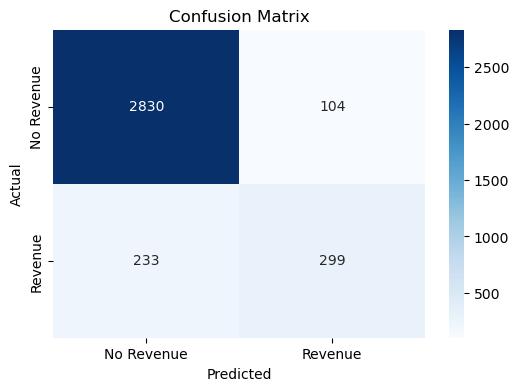

In [157]:
cm = confusion_matrix(y_test, y_xgb_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [158]:
svm_model = SVC(random_state=123)
svm_model.fit(x_train, y_train)
y_svm_pred = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, y_svm_pred)
print(f'SVM Classifier Model Accuracy: {svm_accuracy:.4f}')
print(f"Classification Report:\n{classification_report(y_test, y_svm_pred)}")

SVM Classifier Model Accuracy: 0.8935
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2934
        True       0.78      0.43      0.55       532

    accuracy                           0.89      3466
   macro avg       0.84      0.70      0.75      3466
weighted avg       0.88      0.89      0.88      3466



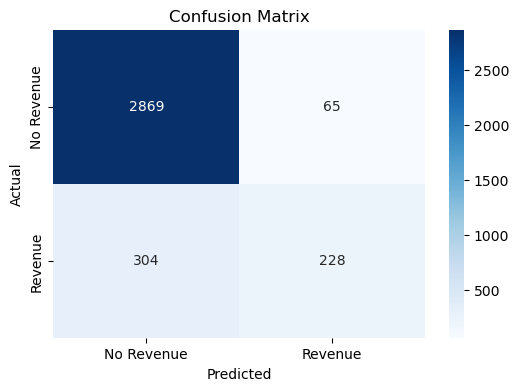

In [159]:
cm = confusion_matrix(y_test, y_svm_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# further options
- change test-train split ratio
- try without scaling
- more/clean up graphs/visualizations
- requirements.txt file